In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("A_stat_data_112.csv")

In [ ]:
df2=df.copy()
df2.head()

,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,中,生活知識,非連續,112,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6293485111595748020,240621445882253268
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4998280410504838977,-3340858198738005072


In [ ]:
difficulty_mapping = {
    '難': 10,
    '中': 5,
    '易': 1
}
df2['mission_difficulty'] = df2['mission_difficulty'].map(difficulty_mapping)
df2.head()

,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,1.0,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,5.0,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,10.0,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,5.0,生活知識,非連續,112,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6293485111595748020,240621445882253268
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,1.0,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4998280410504838977,-3340858198738005072


In [ ]:
# 1. 使用布林索引篩選數據
df141 = df2[df2['mission_difficulty'] == 1]
df142 = df2[df2['mission_difficulty'] == 5]
df143 = df2[df2['mission_difficulty'] != 1 & (df2['mission_difficulty'] != 5)]  # 其他
# 可選：重置索引
# df141 = df141.reset_index(drop=True)
# df142 = df142.reset_index(drop=True)
# df143 = df143.reset_index(drop=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 計算平均值和標準差
data = {
    'df141': [df141['answer_duration_sec'].mean(), df141['answer_duration_sec'].std()],
    'df142': [df142['answer_duration_sec'].mean(), df142['answer_duration_sec'].std()],
    'df143': [df143['answer_duration_sec'].mean(), df143['answer_duration_sec'].std()]
}
data

{'df141': [145.3034332307539, 320.74922145977115],
 'df142': [151.19548878490946, 334.1829165014446],
 'df143': [147.81864692265427, 331.4081305456421]}

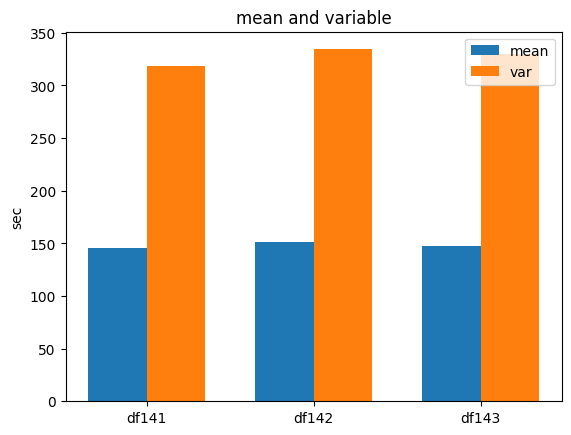

In [ ]:
df_stats = pd.DataFrame.from_dict(data, orient='index', columns=['平均值', '標準差'])


# 繪製長條圖
fig, ax = plt.subplots()
width = 0.35  # 長條寬度
x = np.arange(len(df_stats.index))  # x 軸位置

rects1 = ax.bar(x - width/2, df_stats['平均值'], width, label='mean')
rects2 = ax.bar(x + width/2, df_stats['標準差'], width, label='var')

# 設定圖表元素
ax.set_ylabel('sec')
ax.set_title('mean and variable')
ax.set_xticks(x)
ax.set_xticklabels(df_stats.index)  # 使用 DataFrame 的索引作為 x 軸標籤
ax.legend()

# 顯示圖表
plt.show()

In [ ]:
# 1. Create a copy of df2
df2_cleaned = df2.copy()

# 2. Replace inf with NaN
df2_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# 3. Drop rows with NaN in both columns of interest
df2_cleaned.dropna(subset=['answer_duration_sec', 'mission_difficulty'], inplace=True)

# 4. Prepare data for regression
x = df2_cleaned['mission_difficulty']  # Independent variable
y = df2_cleaned['answer_duration_sec']  # Dependent variable

# 5. Add constant term to the independent variable
X = sm.add_constant(x)

# 6. Create and fit the OLS model
model = sm.OLS(y, X).fit()

# 7. Print the model summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     answer_duration_sec   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     2.050
Date:                 Mon, 09 Dec 2024   Prob (F-statistic):              0.152
Time:                         12:54:34   Log-Likelihood:            -3.0804e+06
No. Observations:               426805   AIC:                         6.161e+06
Df Residuals:                   426803   BIC:                         6.161e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                149.1

In [ ]:
import pandas as pd
import numpy as np

# 計算平均值和標準差
correct_rate_mean = df2['correct_rate'].mean()
correct_rate_std = df2['correct_rate'].std()
answer_duration_mean = df2['answer_duration_sec'].mean()
answer_duration_std = df2['answer_duration_sec'].std()

# 計算相關係數
correlation = df2['correct_rate'].corr(df2['answer_duration_sec'])

# 顯示結果
print(f"正確率平均值: {correct_rate_mean}")
print(f"正確率標準差: {correct_rate_std}")
print(f"作答時間平均值: {answer_duration_mean}")
print(f"作答時間標準差: {answer_duration_std}")
print(f"正確率和作答時間的相關係數: {correlation}")

正確率平均值: 0.41216635299093796
正確率標準差: 0.31796329663504025
作答時間平均值: 147.31882996412475
作答時間標準差: 327.09958707901905
正確率和作答時間的相關係數: 0.14829499716647582


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# 1. Create a copy of df2 to avoid modifying the original DataFrame
df2_cleaned = df2.copy()

# 2. Replace inf with NaN
df2_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# 3. Drop rows with NaN in 'answer_duration_sec' and 'correct rate' columns
df2_cleaned=df2_cleaned.dropna(subset=['answer_duration_sec', 'correct_rate'])

# 4. Now perform the linear regression on the cleaned data
x = df2_cleaned['answer_duration_sec']  # 作答時間作為自變數
y = df2_cleaned['correct_rate']  # 正確率作為應變數

# 添加常數項
X = sm.add_constant(x)

# 建立模型
model = sm.OLS(y, X).fit()

# 顯示結果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           correct_rate   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4206.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        05:21:30   Log-Likelihood:                -48848.
No. Observations:              187037   AIC:                         9.770e+04
Df Residuals:                  187035   BIC:                         9.772e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3920    

In [ ]:
df13=df.dropna(subset=['mission_difficulty', 'correct_rate'])
difficulty_mapping = {
    '難': 3,
    '中': 2,
    '易': 1
}
df13['mission_difficulty'] = df13['mission_difficulty'].map(difficulty_mapping)
df131 = df13[df13['mission_difficulty'] == 1]
df132 = df13[df13['mission_difficulty'] == 2]
df133 = df13[df13['mission_difficulty'] == 3]

<ipython-input-14-3309c4412453>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['mission_difficulty'] = df13['mission_difficulty'].map(difficulty_mapping)


In [ ]:
# 計算平均值和標準差
correct_rate_mean = df13['correct_rate'].mean()
correct_rate_std = df13['correct_rate'].std()
mission_difficulty_mean = df13['mission_difficulty'].mean()
mission_difficulty_std = df13['mission_difficulty'].std()

# 計算相關係數
correlation = df13['correct_rate'].corr(df13['mission_difficulty'])

# 顯示結果
print(f"正確率平均值: {correct_rate_mean}")
print(f"正確率標準差: {correct_rate_std}")
print(f"難易度平均值: {mission_difficulty_mean}")
print(f"難易度標準差: {mission_difficulty_std}")
print(f"正確率和難易度的相關係數: {correlation}")

正確率平均值: 0.4229585901619531
正確率標準差: 0.3210133739822876
難易度平均值: 1.8735893310369833
難易度標準差: 0.6523512390948268
正確率和難易度的相關係數: -0.037917972433008915


In [ ]:
x=df13["mission_difficulty"]
y=df13["correct_rate"]
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           correct_rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     254.1
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.55e-57
Time:                        05:21:45   Log-Likelihood:                -49766.
No. Observations:              176512   AIC:                         9.954e+04
Df Residuals:                  176510   BIC:                         9.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4579      0

In [ ]:
df

,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112.0,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-8.373966e+18,8.154604e+18
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112.0,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.516684e+18,3.762301e+18
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112.0,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-6.579905e+16,4.652808e+18
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,中,生活知識,非連續,112.0,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-6.293485e+18,2.406214e+17
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112.0,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.998280e+18,-3.340858e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781351,5,12/25 探索無人商店【科技教育－現代科技】(初階),易,生活知識,連續,112.0,112-1,Mon Dec 25 08:00:00 UTC 2023,已派發任務,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.288342e+18,1.960586e+18
781352,5,12/25 探索無人商店【科技教育－現代科技】(初階),易,生活知識,連續,112.0,112-1,Mon Dec 25 08:00:00 UTC 2023,已派發任務,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.343164e+18,1.960586e+18
781353,5,12/25 3D列印【科技教育－現代科技】(初階),中,議題,非連續,112.0,112-1,Mon Dec 25 08:00:00 UTC 2023,已派發任務,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.343164e+18,-4.381292e+18
781354,5,12/25 3D列印【科技教育－現代科技】(初階),中,議題,非連續,112.0,112-1,Mon Dec 25 08:00:00 UTC 2023,已派發任務,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.683716e+18,-4.381292e+18


#不同領域相同難易度下的正確率和答題時間

In [3]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download


--2024-12-09 13:53:26--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.12.113, 108.177.12.102, 108.177.12.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.12.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-12-09 13:53:26--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   126MB/s    in 0.2s    

2024-12-09 13:5

In [4]:

!apt-get install -y fontconfig
!fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fontconfig is already the newest version (2.13.1-4.2ubuntu5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

,mission_difficulty,mission_field,correct_rate,answer_duration_sec
10,易,生活知識,0.0,10.0
11,中,議題,0.4,31.0
40,難,議題,0.2,15.0
64,難,生活知識,0.2,6.0
65,難,生活知識,0.4,11.0
...,...,...,...,...
1909904,難,議題,0.4,7.0
1909905,易,世界櫥窗,0.2,8.0
1909909,難,議題,0.0,15.0
1909913,易,世界櫥窗,0.2,6.0


,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4998280410504838977,-3340858198738005072
5,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6497967838849495638,-3340858198738005072
7,5,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-570083966412836310,-3340858198738005072
10,5,05/23 一起來看臺灣芒果【多元文化教育－異國美食】（初階）,易,生活知識,連續＋圖表,112,112-2,Thu May 23 08:00:00 UTC 2024,完成任務,1,...,10.0,4,NaN,0.0,0.0,0.0,NaN,0.0,3381812929067740697,8497080254375325300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909939,7,04/22 人與鼠的戰爭【環境教育－動物保育】（中階）,易,世界櫥窗,連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,7435204715123822954,8809938774431070893
1909940,7,04/22 人與鼠的戰爭【環境教育－動物保育】（中階）,易,世界櫥窗,連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,6395402485465944774,8809938774431070893
1909948,7,04/22 人與鼠的戰爭【環境教育－動物保育】（中階）,易,世界櫥窗,連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-4062443811125437860,8809938774431070893
1909951,7,04/22 人與鼠的戰爭【環境教育－動物保育】（中階）,易,世界櫥窗,連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2918709562645711652,8809938774431070893


  mission_field  avg_correct_rate  avg_answer_duration
0          世界櫥窗          0.420716           142.784286
1          人文史地          0.409727           109.296222
2            人物          0.371223           134.045479
3            文化          0.423070           145.582136
4            文學          0.568806           164.743746
5          生活知識          0.457658           149.113547
6          社會科學          0.456699           127.935900
7          自然科學          0.432701           164.158198
8          說明文件          0.454768           154.305366
9            議題          0.343844           105.494644


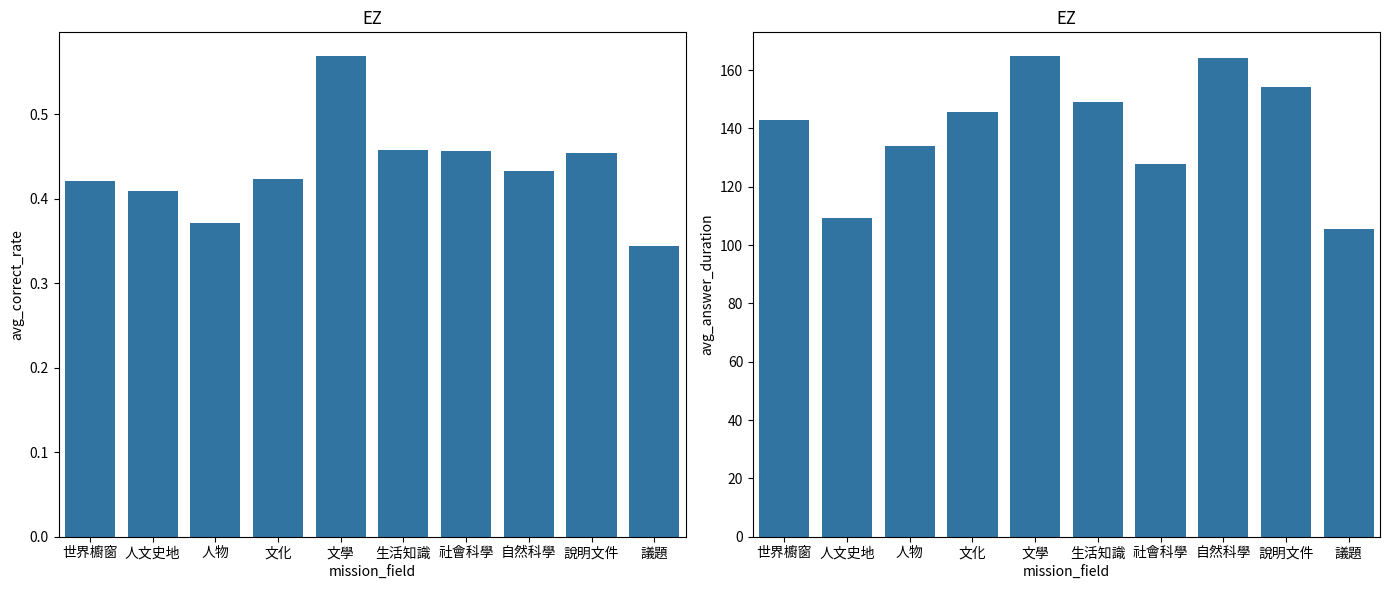

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import fontManager
import matplotlib
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
#display(df.head())


target_col = ['mission_difficulty', 'mission_field', 'correct_rate', 'answer_duration_sec']
target_df = df[target_col]


target_df = target_df.dropna()
display(target_df)


# 根據難易度進行分組並計算每個領域的指標
difficulty = '易'  # 可以調整這個參數
filtered_data = df[df['mission_difficulty'] == difficulty]
display(filtered_data)

# 計算每個 mission_field 的平均正確率和平均答題時間
groupedEZ = filtered_data.groupby('mission_field').agg(
    avg_correct_rate=('correct_rate', 'mean'),
    avg_answer_duration=('answer_duration_sec', 'mean')
).reset_index()

print(groupedEZ)




# 畫圖 - 條形圖比較不同 mission_field 的平均正確率與答題時間
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 平均正確率
sns.barplot(x='mission_field', y='avg_correct_rate', data=groupedEZ, ax=axes[0])
axes[0].set_title(f"EZ")
axes[0].set_ylabel("avg_correct_rate")
axes[0].set_xlabel("mission_field")

# 平均答題時間
sns.barplot(x='mission_field', y='avg_answer_duration', data=groupedEZ, ax=axes[1])
axes[1].set_title(f"EZ")
axes[1].set_ylabel("avg_answer_duration")
axes[1].set_xlabel("mission_field")

plt.tight_layout()
plt.show()

,mission_difficulty,mission_field,correct_rate,answer_duration_sec
10,易,生活知識,0.0,10.0
11,中,議題,0.4,31.0
40,難,議題,0.2,15.0
64,難,生活知識,0.2,6.0
65,難,生活知識,0.4,11.0
...,...,...,...,...
1909904,難,議題,0.4,7.0
1909905,易,世界櫥窗,0.2,8.0
1909909,難,議題,0.0,15.0
1909913,易,世界櫥窗,0.2,6.0


,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,中,生活知識,非連續,112,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6293485111595748020,240621445882253268
6,5,05/16 沙漠動物的生存策略【環境教育－動物奇聞】（初階）,中,自然科學,非連續,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3381812929067740697,-4876813974692762
8,5,05/16 沙漠動物的生存策略【環境教育－動物奇聞】（初階）,中,自然科學,非連續,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-885883585242746132,-4876813974692762
9,5,05/20 揚州炒飯【多元文化教育－異國美食】（初階）,中,文化,連續,112,112-2,Mon May 20 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-570083966412836310,2025105592901405804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909771,7,04/18 深海熱泉【環境教育－悠遊天地】（中階）,中,自然科學,連續,112,112-2,Thu Apr 18 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,568676939790071965,6660297006397622235
1909774,8,04/18 深海熱泉【環境教育－悠遊天地】（中階）,中,自然科學,連續,112,112-2,Thu Apr 18 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-5092086816422616058,6660297006397622235
1909777,9,04/18 深海熱泉【環境教育－悠遊天地】（中階）,中,自然科學,連續,112,112-2,Thu Apr 18 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-1417099017150200873,6660297006397622235
1909781,8,04/18 深海熱泉【環境教育－悠遊天地】（中階）,中,自然科學,連續,112,112-2,Thu Apr 18 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-3715006712266383290,6660297006397622235


  mission_field  avg_correct_rate  avg_answer_duration
0          世界櫥窗          0.446415           157.073807
1          人文史地          0.395894           122.164856
2            人物          0.380623           192.006141
3            文化          0.395301           144.179158
4            文學          0.455368           155.813242
5          生活知識          0.431398           158.566632
6          社會科學          0.398393           139.385045
7          自然科學          0.427499           166.826343
8          說明文件          0.426101           147.517360
9            議題          0.412272           142.348859


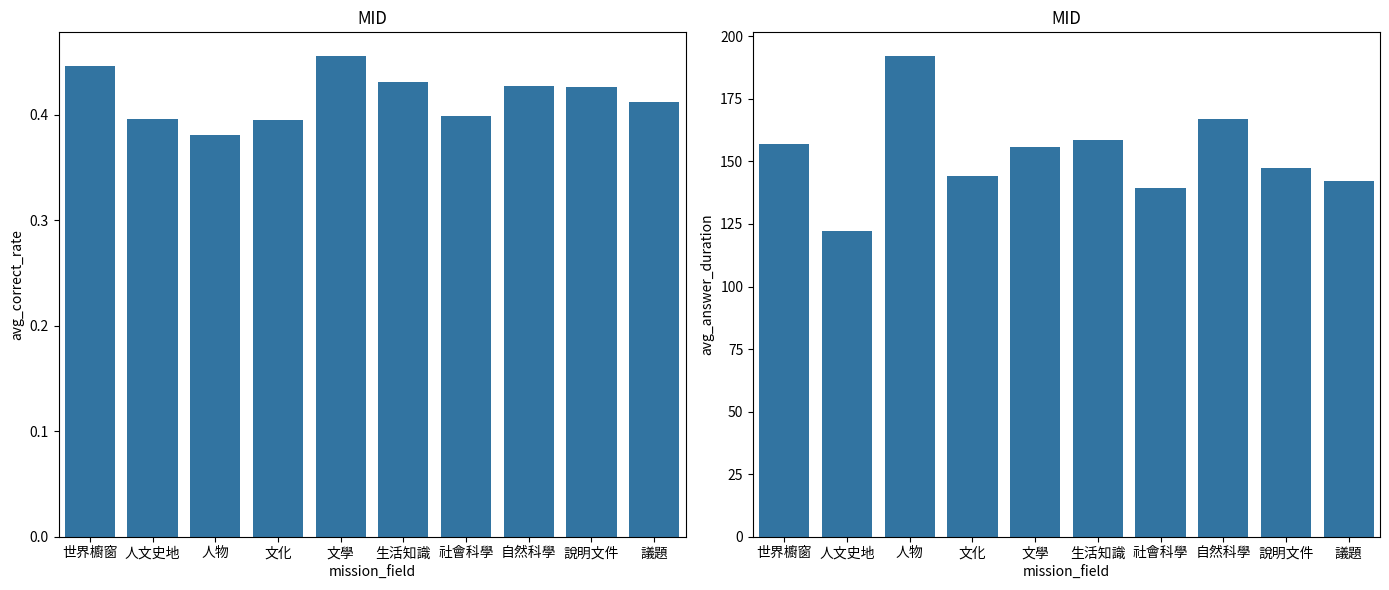

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import fontManager


#display(df.head())


target_col = ['mission_difficulty', 'mission_field', 'correct_rate', 'answer_duration_sec']
target_df = df[target_col]


target_df = target_df.dropna()
display(target_df)


# 根據難易度進行分組並計算每個領域的指標
difficulty = '中'  # 可以調整這個參數
filtered_data = df[df['mission_difficulty'] == difficulty]
display(filtered_data)

# 計算每個 mission_field 的平均正確率和平均答題時間
groupedMID = filtered_data.groupby('mission_field').agg(
    avg_correct_rate=('correct_rate', 'mean'),
    avg_answer_duration=('answer_duration_sec', 'mean')
).reset_index()

print(groupedMID)



# 畫圖 - 條形圖比較不同 mission_field 的平均正確率與答題時間
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 平均正確率
sns.barplot(x='mission_field', y='avg_correct_rate', data=groupedMID, ax=axes[0])
axes[0].set_title(f"MID")
axes[0].set_ylabel("avg_correct_rate")
axes[0].set_xlabel("mission_field")

# 平均答題時間
sns.barplot(x='mission_field', y='avg_answer_duration', data=groupedMID, ax=axes[1])
axes[1].set_title(f"MID")
axes[1].set_ylabel("avg_answer_duration")
axes[1].set_xlabel("mission_field")

plt.tight_layout()
plt.show()

,mission_difficulty,mission_field,correct_rate,answer_duration_sec
10,易,生活知識,0.0,10.0
11,中,議題,0.4,31.0
40,難,議題,0.2,15.0
64,難,生活知識,0.2,6.0
65,難,生活知識,0.4,11.0
...,...,...,...,...
1909904,難,議題,0.4,7.0
1909905,易,世界櫥窗,0.2,8.0
1909909,難,議題,0.0,15.0
1909913,易,世界櫥窗,0.2,6.0


,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405
29,5,06/17 《隨園食單・須知單》（節錄）【多元文化教育－飲食文化】（初階）,難,文學,連續,112,112-2,Mon Jun 17 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,5659261515115319851,-1846083354963022384
31,5,06/17 《隨園食單・須知單》（節錄）【多元文化教育－飲食文化】（初階）,難,文學,連續,112,112-2,Mon Jun 17 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-570083966412836310,-1846083354963022384
38,4,06/24 被誤會的塑膠袋？【能源教育－環境保育】（初階）,難,議題,連續,112,112-2,Mon Jun 24 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-3189297556778125580,325126197002900849
39,6,06/24 被誤會的塑膠袋？【能源教育－環境保育】（初階）,難,議題,連續,112,112-2,Mon Jun 24 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,325126197002900849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909943,7,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）,難,議題,非連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4024315604566353377,703618323232836566
1909946,7,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）,難,議題,非連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-506666874730740645,703618323232836566
1909949,7,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）,難,議題,非連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,568676939790071965,703618323232836566
1909954,8,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）,難,議題,非連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,5090607127449525741,703618323232836566


  mission_field  avg_correct_rate  avg_answer_duration
0          世界櫥窗          0.395040           160.852209
1          人文史地          0.432667           148.547974
2            人物          0.403657           145.197757
3            文化          0.382522           168.318500
4            文學          0.436356           164.016327
5          生活知識          0.374287           129.585214
6          社會科學          0.411650           152.839276
7          自然科學          0.403775           127.031631
8          說明文件          0.337743           105.794886
9            議題          0.401681           136.010690


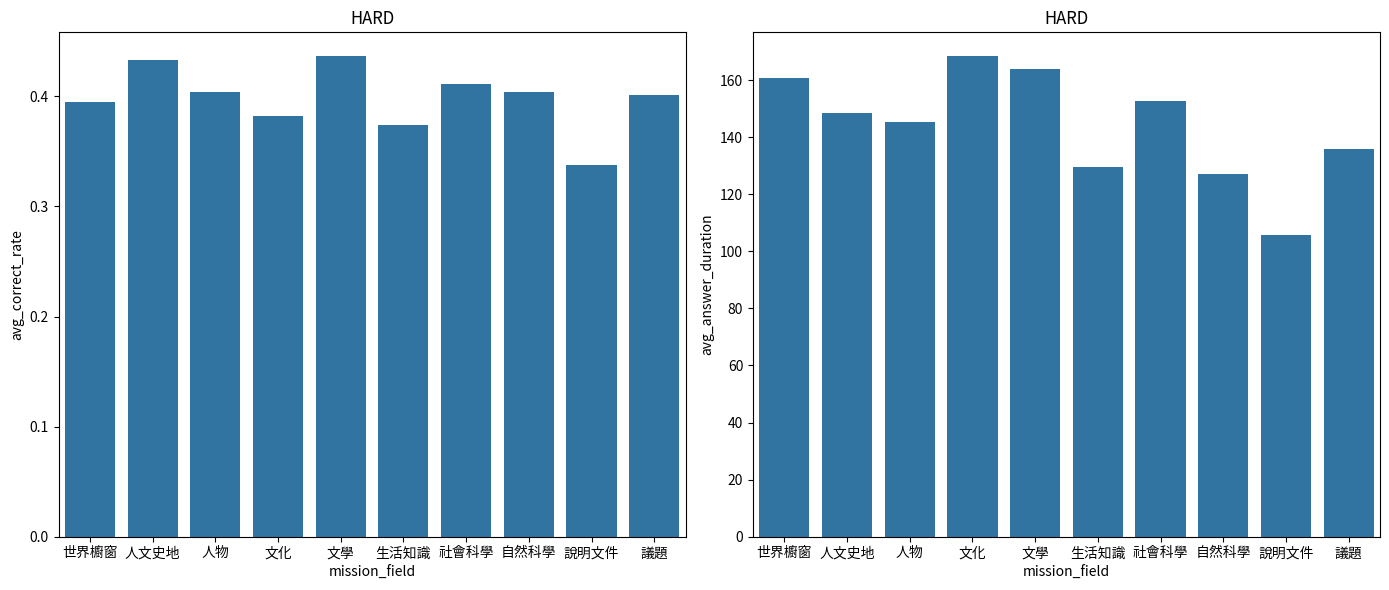

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import fontManager


#display(df.head())


target_col = ['mission_difficulty', 'mission_field', 'correct_rate', 'answer_duration_sec']
target_df = df[target_col]


target_df = target_df.dropna()
display(target_df)


# 根據難易度進行分組並計算每個領域的指標
difficulty = '難'  # 可以調整這個參數
filtered_data = df[df['mission_difficulty'] == difficulty]
display(filtered_data)

# 計算每個 mission_field 的平均正確率和平均答題時間
groupedHARD = filtered_data.groupby('mission_field').agg(
    avg_correct_rate=('correct_rate', 'mean'),
    avg_answer_duration=('answer_duration_sec', 'mean')
).reset_index()

print(groupedHARD)



# 畫圖 - 條形圖比較不同 mission_field 的平均正確率與答題時間
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 平均正確率
sns.barplot(x='mission_field', y='avg_correct_rate', data=groupedHARD, ax=axes[0])
axes[0].set_title(f"HARD")
axes[0].set_ylabel("avg_correct_rate")
axes[0].set_xlabel("mission_field")

# 平均答題時間
sns.barplot(x='mission_field', y='avg_answer_duration', data=groupedHARD, ax=axes[1])
axes[1].set_title(f"HARD")
axes[1].set_ylabel("avg_answer_duration")
axes[1].set_xlabel("mission_field")

plt.tight_layout()
plt.show()

In [ ]:
final=groupedEZ["avg_correct_rate"]*1+groupedMID["avg_correct_rate"]*2+groupedHARD["avg_correct_rate"]*3
df1001=pd.DataFrame([groupedEZ["mission_field"],final])
df1001

,0,1,2,3,4,5,6,7,8,9
mission_field,世界櫥窗,人文史地,人物,文化,文學,生活知識,社會科學,自然科學,說明文件,議題
avg_correct_rate,2.495106,2.493058,2.344475,2.36039,2.79159,2.442076,2.487234,2.495343,2.324055,2.373225
